In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales = pd.read_csv(r"C:\Users\golna\OneDrive\Desktop\Personal Projects\store.csv")

In [5]:
sales.head(5)

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [6]:
sales.shape

(10000, 5)

In [7]:
sales.describe()

,qty,revenue
count,10000.000000,10000.000000
mean,3.387400,90.570221
std,4.318308,127.803928
min,1.000000,18.430000
25%,2.000000,39.300000
50%,2.000000,58.425000
75%,3.000000,75.000000
max,25.000000,1998.750000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reps     10000 non-null  object 
 1   product  10000 non-null  object 
 2   qty      10000 non-null  int64  
 3   revenue  10000 non-null  float64
 4   region   10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [9]:
sales['reps'].unique()

array(['Chitra', 'Vijay', 'Mala', 'Suman', 'Rachna', 'Aash', 'Chand',
       'Suraj', 'Bala', 'Seet', 'Ravi', 'Anusha', 'Ananya', 'Jaggi',
       'Reva', 'Meena', 'Sai', 'Rahul', 'Ram', 'Prarth', 'Pooja', 'Rishi',
       'Ranga', 'Sesh', 'Shaanth', 'Bharath', 'Susan', 'Ratna', 'Easwar',
       'Prasad', 'Madhu', 'Suresh', 'Anahit', 'Sumedh', 'Manju',
       'Nandini', 'Santosh', 'Satyen', 'Vaghya', 'Palak', 'Aparna',
       'Jagdish', 'Vish', 'Kumar', 'John', 'Bhat', 'Hussain', 'Alka',
       'Rohini', 'Keshab', 'Nidhi', 'Satya', 'Venkat', 'Veeyes', 'Rajat',
       'Chandra', 'Kamat', 'Raji', 'Swami', 'Jay', 'Mukund', 'Priya',
       'Kishen', 'Vidya', 'Akila', 'Durga', 'Mak', 'Mehta', 'Javed',
       'Sruti', 'Mukesh', 'Kishore'], dtype=object)

In [10]:
sales['product'].unique()

array(['Galaxy', 'Jet', 'Beacon', 'Alpen', 'Orbit', 'Trident', 'Mars',
       'Milka', 'Almond', 'Prince', 'Star', 'Halls'], dtype=object)

In [11]:
sales['region'].unique()

array(['West', 'North', 'East', 'South'], dtype=object)

In [12]:
print(sales.qty.max())
print(sales.qty.min())

25
1


In [13]:
print(sales.revenue.max())
print(sales.revenue.min())

1998.75
18.43


Count of transactions made by each sales representitive

In [15]:
pd.value_counts(sales.reps, sort=True)

C:\Users\golna\AppData\Local\Temp\ipykernel_20512\3529153900.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(sales.reps, sort=True)


reps
Seet       353
Rachna     318
Santosh    318
Aash       315
Vish       308
          ... 
Ram         84
Jay         84
Anusha      82
Sesh        81
Rohini      79
Name: count, Length: 72, dtype: int64

Get a summary of sales for a perticular representitive named "Seet"

In [16]:
gb = sales.groupby(['reps'])
gb.get_group('Seet').head(10)

C:\Users\golna\AppData\Local\Temp\ipykernel_20512\1233537775.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  gb.get_group('Seet').head(10)


,reps,product,qty,revenue,region
10,Seet,Alpen,2,67.32,South
14,Seet,Jet,1,19.95,South
19,Seet,Orbit,3,67.13,South
38,Seet,Jet,3,59.25,South
81,Seet,Jet,20,399.00,South
99,Seet,Orbit,3,67.82,South
169,Seet,Alpen,2,68.00,South
171,Seet,Milka,2,45.21,South
365,Seet,Almond,1,25.00,South
368,Seet,Milka,3,67.82,South


C:\Users\golna\AppData\Local\Temp\ipykernel_20512\969976729.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  Seet = gb.get_group('Seet').qty


Text(0.5, 1.0, 'Sales by rep "Seet"')

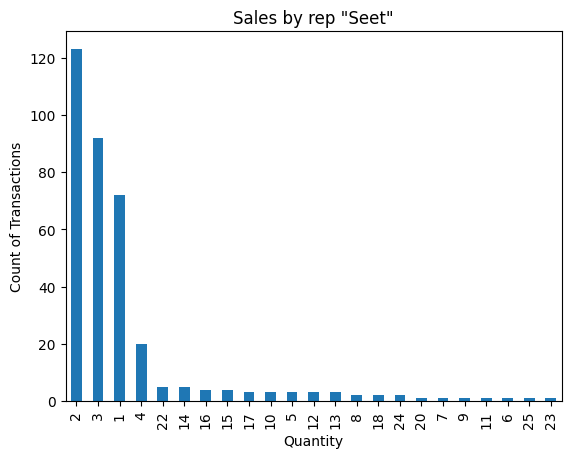

In [53]:
Seet = gb.get_group('Seet').qty
Seet.value_counts().plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Count of Transactions')
plt.title('Sales by rep "Seet"')

For aggregating data (of region, reps and product), pivot table is used and the aggregation function is numerical sum. 

In [18]:
pd.pivot_table(sales, index=["region", "reps", "product"], aggfunc=np.sum) [:12]

C:\Users\golna\AppData\Local\Temp\ipykernel_20512\4040578485.py:1: FutureWarning: The provided callable <function sum at 0x000002734207B600> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(sales, index=["region", "reps", "product"], aggfunc=np.sum) [:12]


qty  revenue
region reps product              
East   Aash Almond   102  2535.02
            Alpen    186  6217.75
            Beacon    48  1190.76
            Galaxy    30  2378.10
            Halls     17   319.11
            Jet      145  2861.58
            Mars     173  4012.66
            Milka    127  2876.64
            Orbit    103  2323.66
            Prince    82  2221.74
            Star      62  1288.15
            Trident   60  1773.30

What is the revenue for each region.

In [19]:
total_rev = sales.groupby('region') ['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

In [20]:
df_w = sales[sales['region'] == 'West']
sales_west = df_w.groupby('reps')['revenue'].apply(lambda x: x.sum())
df_e = sales[sales['region'] == 'East']   
sales_east = df_e.groupby('reps')['revenue'].apply(lambda x: x.sum())
df_n = sales[sales['region'] == 'North']   
sales_north = df_n.groupby('reps')['revenue'].apply(lambda x: x.sum())
df_s = sales[sales['region'] == 'South']   
sales_south = df_s.groupby('reps')['revenue'].apply(lambda x: x.sum()) 
total_rev_rep = sales.groupby('reps')['revenue' ].apply(lambda x: x.sum())
total_rev_rep [:5]

reps
Aash      29998.47
Akila      7495.80
Alka      11464.96
Anahit     7376.05
Ananya    18510.93
Name: revenue, dtype: float64

What is the revenue for each sales representative? 

In [21]:
total_tr = sales.groupby('reps')['revenue' ].apply(lambda x: x.count())
total_tr[:5] 

reps
Aash      315
Akila     109
Alka      116
Anahit    104
Ananya    216
Name: revenue, dtype: int64

In [22]:
sales.reps.unique().size

72

In [23]:
total_rev_rep.sum()

np.float64(905702.21)

What are counts of transactions for each product?

In [24]:
product_tr = sales.groupby('product')['qty'].apply(lambda x: x.count())
product_tr.sort_values(ascending=False)

product
Alpen      1588
Milka      1294
Jet        1274
Orbit      1255
Almond     1015
Trident     659
Star        652
Beacon      651
Mars        638
Galaxy      342
Prince      325
Halls       307
Name: qty, dtype: int64

Text(0.5, 1.0, 'Plot of transactions for each product')

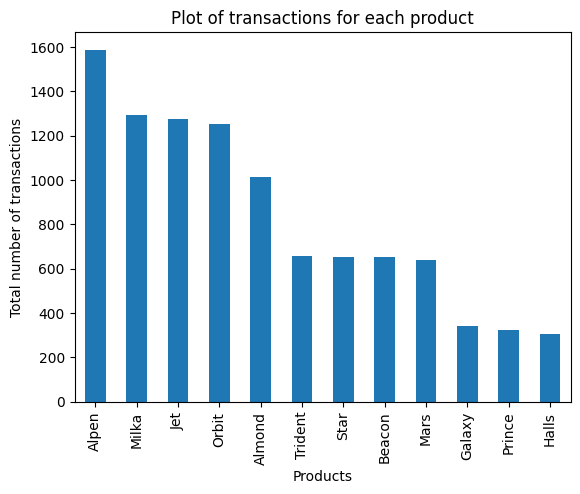

In [25]:
sales.groupby(['product']).qty.count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total number of transactions')
plt.title('Plot of transactions for each product')

C:\Users\golna\AppData\Local\Temp\ipykernel_20512\395526683.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  dk1 = dk.get_group('Alpen').qty.value_counts()


Text(0.5, 1.0, 'Sales of Product: Alpen')

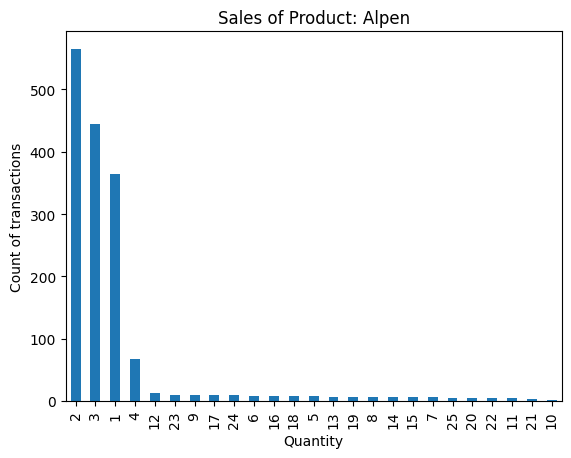

In [26]:
dk = sales.groupby(['product'])
dk1 = dk.get_group('Alpen').qty.value_counts()
dk1.plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Count of transactions')
plt.title('Sales of Product: Alpen')

What is the total quantity sold for each product?

In [27]:
product_sum = sales.groupby('product')['qty'].apply(lambda x: x.sum())
product_sum.sort_values(ascending=False)

product
Alpen      5267
Orbit      4375
Jet        4262
Milka      4153
Almond     3258
Mars       2498
Trident    2436
Beacon     2152
Star       2101
Prince     1253
Galaxy     1150
Halls       969
Name: qty, dtype: int64

In [28]:
product_sum.sum()

np.int64(33874)

Summary of revenue generated by representitive in each region

In [31]:
print('Number of Reps - South region:', sales_south.size, 'Revenue generated is:', sales_south.sum())
print('Number of Reps - West region:', sales_west.size,  'Revenue generated is:', sales_west.sum())
print('Number of Reps - North region:', sales_north.size, 'Revenue generated is:', sales_north.sum())
print('Number of Reps - East region:', sales_east.size, 'Revenue generated is:', sales_east.sum())

Number of Reps - South region: 12 Revenue generated is: 158819.84999999998
Number of Reps - West region: 23 Revenue generated is: 274631.29
Number of Reps - North region: 25 Revenue generated is: 326109.54000000004
Number of Reps - East region: 12 Revenue generated is: 146141.53


In [32]:
total_rev = sales.groupby('region')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Revenue generated for each region')

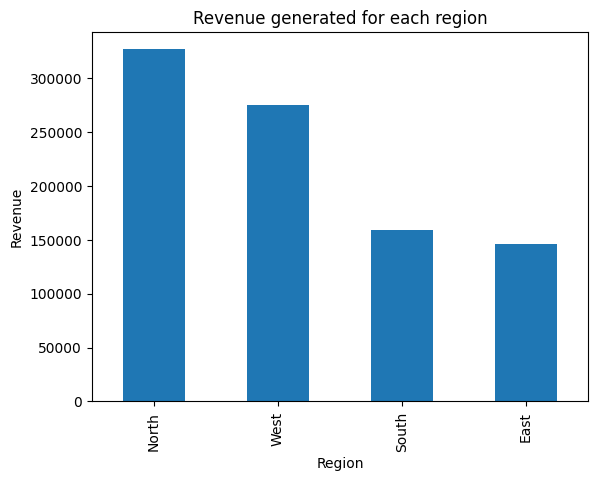

In [33]:
total_rev.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Revenue generated for each region')

Per capita revenue = Total revenue / Number of sales representitives:

In [34]:
print('Average revenue generated in South region is:', sales_south.mean())
print('Average revenue generated in West region is:', sales_west.mean())
print('Average revenue generated in North region is:', sales_north.mean())
print('Average revenue generated in East region is:', sales_east.mean())

Average revenue generated in South region is: 13234.987499999997
Average revenue generated in West region is: 11940.490869565216
Average revenue generated in North region is: 13044.3816
Average revenue generated in East region is: 12178.460833333333


* Product Segmentation:

In [38]:
df_n = sales[sales['region'] == 'North']   
productsales_north = df_n.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_north.sort_values(ascending=False)

df_s = sales[sales['region'] == 'South']   
productsales_south = df_s.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_south.sort_values(ascending=False)

df_w = sales[sales['region'] == 'West']   
productsales_west = df_w.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_west.sort_values(ascending=False)

df_e = sales[sales['region'] == 'East']   
productsales_east = df_e.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_east.sort_values(ascending=False)

productsales = sales.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales.sort_values(ascending=False)

product
Alpen      177152.07
Orbit       99284.25
Milka       94249.40
Galaxy      90919.18
Jet         84077.56
Almond      80581.91
Trident     72289.20
Mars        58109.60
Beacon      53164.41
Star        43637.99
Prince      34025.46
Halls       18211.18
Name: revenue, dtype: float64

Create dataframes for productsales and product_qty

In [40]:
df_sales = pd.DataFrame(product_tr)
df_sales.columns = [ 'transactions']
df_sales.reset_index()

df_sales1 = pd.DataFrame(productsales)
df_sales1.reset_index()

product_qty = sales.groupby('product')['qty'].apply(lambda x: x.sum())
df_sales2 = pd.DataFrame(product_qty)

product_tr_rev = pd.concat([df_sales2,df_sales1], axis=1)
product_tr_rev.reset_index(inplace=True)
product_tr_rev[:5]

,product,qty,revenue
0,Almond,3258,80581.91
1,Alpen,5267,177152.07
2,Beacon,2152,53164.41
3,Galaxy,1150,90919.18
4,Halls,969,18211.18


In [41]:
product_qty = pd.concat([df_sales,df_sales1], axis=1)
product_tr_rev['unit_price'] = product_tr_rev.revenue/product_tr_rev.qty
product_tr_rev

,product,qty,revenue,unit_price
0,Almond,3258,80581.91,24.733551
1,Alpen,5267,177152.07,33.634340
2,Beacon,2152,53164.41,24.704651
3,Galaxy,1150,90919.18,79.060157
4,Halls,969,18211.18,18.793787
5,Jet,4262,84077.56,19.727255
6,Mars,2498,58109.60,23.262450
7,Milka,4153,94249.40,22.694293
8,Orbit,4375,99284.25,22.693543
9,Prince,1253,34025.46,27.155196


The unit price for each product:

In [42]:
unit_p = product_tr_rev.groupby('product')['unit_price'].apply(lambda x: x.sum())
unit_p.sort_values(ascending=False)

product
Galaxy     79.060157
Alpen      33.634340
Trident    29.675369
Prince     27.155196
Almond     24.733551
Beacon     24.704651
Mars       23.262450
Milka      22.694293
Orbit      22.693543
Star       20.770105
Jet        19.727255
Halls      18.793787
Name: unit_price, dtype: float64

Text(0.5, 1.0, 'Uni price for each product')

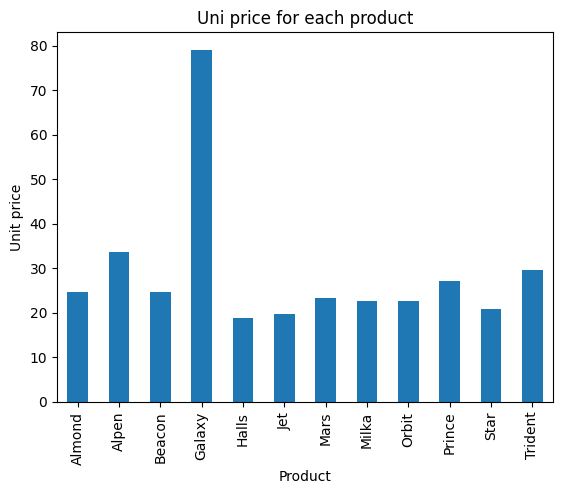

In [43]:
unit_p.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Unit price')
plt.title('Uni price for each product')

Galaxy is the highest unit price while Halls is the lowest unit price. 

Text(0.5, 1.0, 'Total revenue generated for each product')

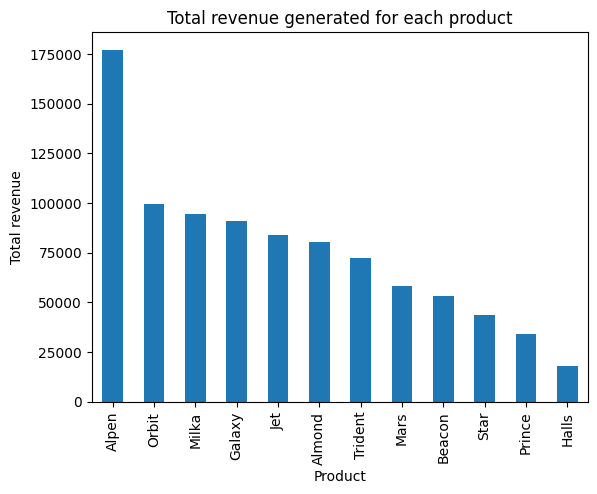

In [44]:
productsales.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total revenue')
plt.title('Total revenue generated for each product')

Alpen generated the highest revenue while Halls generated the smallest revenue. 

Text(0.5, 1.0, 'Total quantity generated for each product')

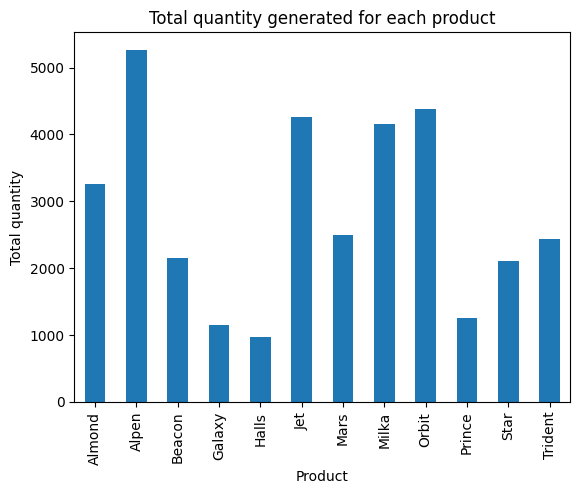

In [45]:
qty_p = product_tr_rev.groupby('product')['qty'].apply(lambda x: x.sum())
qty_p.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total quantity')
plt.title('Total quantity generated for each product')

Text(0, 0.5, 'Product, Region')

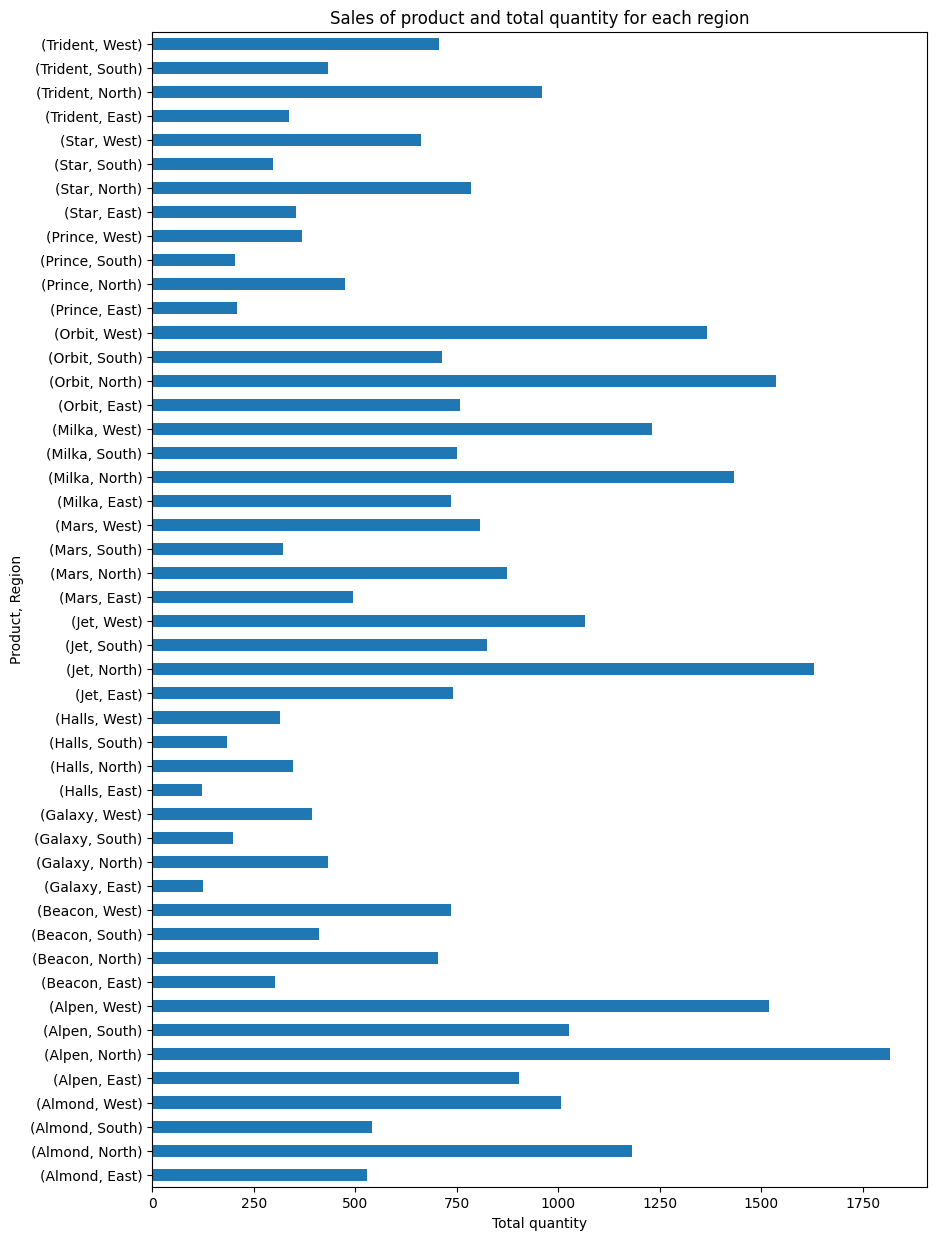

In [48]:
region_p = sales.groupby(['product', 'region'])['qty'].apply(lambda x: x.sum())
region_p.plot(kind='barh', figsize=(10, 15))
plt.title('Sales of product and total quantity for each region')
plt.xlabel('Total quantity')
plt.ylabel('Product, Region')

Text(0.5, 0, 'Total Revenue')

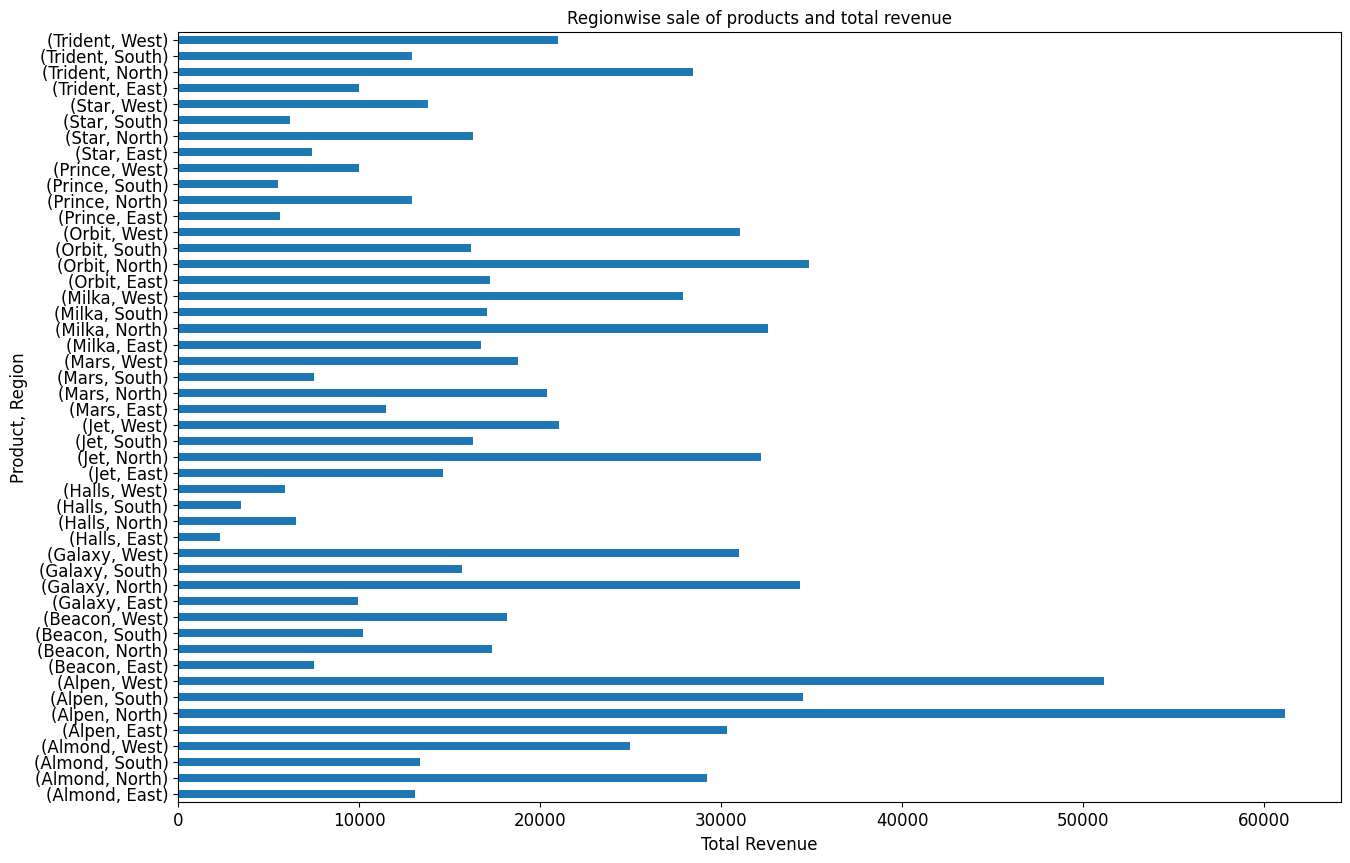

In [49]:
region_rev = sales.groupby(['product', 'region'])['revenue'].apply(lambda x: x.sum())
region_rev.plot(kind='barh', fontsize=12,figsize=(15,10) )
plt.title('Regionwise sale of products and total revenue')
plt.ylabel('Product, Region', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12)

In [50]:
df_sales = pd.DataFrame(total_tr)
df_sales.columns = [ 'transactions']
df_sales.reset_index()

df_sales1 = pd.DataFrame(total_rev_rep)
df_sales1.reset_index()

sales_tr = pd.concat([df_sales,df_sales1], axis=1)
sales_tr.reset_index(inplace=True)
sales_tr[:5]

,reps,transactions,revenue
0,Aash,315,29998.47
1,Akila,109,7495.80
2,Alka,116,11464.96
3,Anahit,104,7376.05
4,Ananya,216,18510.93


* Clustering (using Hierachical algorithm)

In [51]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import sklearn.metrics as sm